In [86]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cert-insider-threat-detection-research/users.csv
/kaggle/input/cert-insider-threat-detection-research/logon.csv
/kaggle/input/cert-insider-threat-detection-research/device.csv
/kaggle/input/cert-insider-threat-detection-research/psychometric.csv
/kaggle/input/cert-insider-threat-detection-research/http.csv
/kaggle/input/cert-insider-threat-detection-research/email.csv
/kaggle/input/cert-insider-threat-detection-research/file.csv
/kaggle/input/cert-insider-threat-detection-research/decoy_file.csv
/kaggle/input/cert-insider-threat-detection-research/LDAP/2010-08.csv
/kaggle/input/cert-insider-threat-detection-research/LDAP/2011-03.csv
/kaggle/input/cert-insider-threat-detection-research/LDAP/2010-10.csv
/kaggle/input/cert-insider-threat-detection-research/LDAP/2010-02.csv
/kaggle/input/cert-insider-threat-detection-research/LDAP/2010-03.csv
/kaggle/input/cert-insider-threat-detection-research/LDAP/2010-09.csv
/kaggle/input/cert-insider-threat-detection-research/LDAP/2011-04

In [87]:
import os

dataset_path = "/kaggle/input/cert-insider-threat-detection-research"
print(os.listdir(dataset_path))


['LDAP', 'users.csv', 'logon.csv', 'device.csv', 'psychometric.csv', 'http.csv', 'email.csv', 'file.csv', 'decoy_file.csv']


In [88]:
logon = pd.read_csv("/kaggle/input/cert-insider-threat-detection-research/logon.csv", nrows=100000)
file = pd.read_csv("/kaggle/input/cert-insider-threat-detection-research/file.csv", nrows=100000)
email = pd.read_csv("/kaggle/input/cert-insider-threat-detection-research/email.csv", nrows=100000)
decoy = pd.read_csv("/kaggle/input/cert-insider-threat-detection-research/decoy_file.csv", nrows=100000)
http = pd.read_csv("/kaggle/input/cert-insider-threat-detection-research/http.csv" , nrows = 100000)
device = pd.read_csv("/kaggle/input/cert-insider-threat-detection-research/device.csv" , nrows = 100000)

In [89]:
http.head()

,id,date,user,pc,url,activity,content
0,{V1D3-W8BL16YA-2594OWGB},01/02/2010 06:21:31,ANC1950,PC-4921,http://icio.us/John_Edward_Brownlee_as_Attorne...,WWW Visit,Further consultation with post-production team...
1,{C7A0-F6CK17IX-5508HGRY},01/02/2010 06:21:42,ANC1950,PC-4921,http://babycenter.com/Manchester_SmallScale_Ex...,WWW Visit,These two populations have been observed in ma...
2,{C0X3-I5RZ16GM-1535IAMY},01/02/2010 06:21:58,ANC1950,PC-4921,http://babycenter.com/Manchester_SmallScale_Ex...,WWW Visit,These two populations have been observed in ma...
3,{G8V6-M0CF17SO-9968THHW},01/02/2010 06:28:04,ANC1950,PC-4921,http://timeanddate.com/Accurate_News_and_Infor...,WWW Visit,Cape sold the US rights to the recently formed...
4,{I9A3-Z4JU92SK-7362XXPN},01/02/2010 06:29:26,SAB1954,PC-5091,http://timeanddate.com/Accurate_News_and_Infor...,WWW Visit,Cape sold the US rights to the recently formed...


In [90]:
http.isnull().sum()

id          0
date        0
user        0
pc          0
url         0
activity    0
content     0
dtype: int64

In [91]:
http['date'] = pd.to_datetime(http['date'])

http_features = http.groupby('user').agg(
    num_http_requests=('id', 'count'),
    unique_urls=('url', 'nunique'),
    unique_pcs_http=('pc', 'nunique'),
    avg_content_length_http=('content', lambda x: x.str.len().mean())
)


In [92]:
http_features.head()

,num_http_requests,unique_urls,unique_pcs_http,avg_content_length_http
user,,,,
AAB0162,30,7,1,544.333333
AAB0398,21,9,1,471.666667
AAC0610,7,7,1,589.428571
AAC0668,15,12,1,654.666667
AAC3270,2,2,1,479.500000


In [93]:
device.head()

,id,date,user,pc,file_tree,activity
0,{Z2Q8-K3AV28BE-9353JIRT},01/02/2010 07:17:18,SDH2394,PC-5849,R:\;R:\22B5gX4;R:\SDH2394,Connect
1,{C7F1-G7LE60RU-2483DAXS},01/02/2010 07:22:42,JKS2444,PC-6961,R:\;R:\JKS2444,Connect
2,{T9A4-D4RV69OF-1704NINW},01/02/2010 07:31:42,CBA1023,PC-1570,R:\;R:\42gY283;R:\48rr4y2;R:\59ntt61;R:\76xCQG...,Connect
3,{S8L0-O6QQ15NL-0636OYNV},01/02/2010 07:33:28,GNT0221,PC-6427,R:\;R:\GNT0221,Connect
4,{U0F1-R1FX27FM-6954TTVU},01/02/2010 07:33:55,JKS2444,PC-6961,NaN,Disconnect


In [94]:
device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         100000 non-null  object
 1   date       100000 non-null  object
 2   user       100000 non-null  object
 3   pc         100000 non-null  object
 4   file_tree  50202 non-null   object
 5   activity   100000 non-null  object
dtypes: object(6)
memory usage: 4.6+ MB


In [95]:
device.isnull().sum()

id               0
date             0
user             0
pc               0
file_tree    49798
activity         0
dtype: int64

In [96]:
device['file_tree'] = device['file_tree'].fillna("NoTree")


In [97]:
device.isnull().sum()

id           0
date         0
user         0
pc           0
file_tree    0
activity     0
dtype: int64

In [98]:
device_features = device.groupby('user').agg(
    num_device_events=('id', 'count'),
    num_connects=('activity', lambda x: (x == 'Connect').sum()),
    num_disconnects=('activity', lambda x: (x == 'Disconnect').sum()),
    unique_pcs_device=('pc', 'nunique'),
    avg_filetree_length=('file_tree', lambda x: x.dropna().apply(lambda s: len(str(s))).mean())
)


In [99]:
logon.head()

,id,date,user,pc,activity
0,{F3X8-Y2GT43DR-4906OHBL},01/02/2010 02:19:18,DNS1758,PC-0414,Logon
1,{B4Q0-D0GM24KN-3704MAII},01/02/2010 02:31:12,DNS1758,PC-0414,Logoff
2,{T7J1-D4HK34KV-5476TCIJ},01/02/2010 02:34:02,DNS1758,PC-5313,Logon
3,{S4Y6-D8MQ05SA-0759HLIS},01/02/2010 02:53:30,DNS1758,PC-5313,Logoff
4,{F3P0-E7FH78CV-4874FRGZ},01/02/2010 04:07:31,DNS1758,PC-0012,Logon


In [100]:
logon['date'] = pd.to_datetime(logon['date'])
logon_features = logon.groupby('user').agg(
    num_logins=('id', 'count'),                 # total logins
    avg_login_hour=('date', lambda x: x.dt.hour.mean()),  # typical login time
    unique_pcs=('pc', 'nunique')                # number of different PCs used
)

logon_features = logon_features.fillna(0)
print(logon_features.head())


         num_logins  avg_login_hour  unique_pcs
user                                           
AAB0162          19       12.210526           1
AAB0398          20       10.500000           1
AAC0610          25       12.040000           1
AAC0668          19       11.947368           1
AAC3270          20       12.000000           1


In [101]:
file.head()

,id,date,user,pc,filename,activity,to_removable_media,from_removable_media,content
0,{F3E2-X3MV05YQ-3516SZDT},01/02/2010 07:19:41,SDH2394,PC-5849,R:\60WBQE7S.doc,File Open,False,True,"D0-CF-11-E0-A1-B1-1A-E1 Ernesztin's brother, L..."
1,{I6N1-Z7VL92UY-8715ESKQ},01/02/2010 07:21:30,SDH2394,PC-5849,R:\0VGILDW8.pdf,File Write,True,False,25-50-44-46-2D ---- Bengali As do many other T...
2,{G4X5-J7MH70FV-8936QVSB},01/02/2010 07:22:11,SDH2394,PC-5849,R:\60WBQE7S.doc,File Copy,False,True,"D0-CF-11-E0-A1-B1-1A-E1 Ernesztin's brother, L..."
3,{M2M7-Z5ST21EU-6704NSKO},01/02/2010 07:24:06,SDH2394,PC-5849,R:\22B5gX4\H8Y96RRE.doc,File Write,True,False,D0-CF-11-E0-A1-B1-1A-E1 After the death of his...
4,{R0A9-O9XB25PE-9236MALV},01/02/2010 07:24:45,SDH2394,PC-5849,R:\SDH2394\7XRCV2N5.pdf,File Copy,True,False,25-50-44-46-2D Although he restored some of th...


In [102]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    100000 non-null  object
 1   date                  100000 non-null  object
 2   user                  100000 non-null  object
 3   pc                    100000 non-null  object
 4   filename              100000 non-null  object
 5   activity              100000 non-null  object
 6   to_removable_media    100000 non-null  bool  
 7   from_removable_media  100000 non-null  bool  
 8   content               100000 non-null  object
dtypes: bool(2), object(7)
memory usage: 5.5+ MB


In [103]:
file['date'] = pd.to_datetime(file['date'])
file_features = file.groupby('user').agg(
    num_files_accessed=('filename', 'count'),               # total files accessed
    num_files_to_removable=('to_removable_media', 'sum'),   # writes to removable media
    num_files_from_removable=('from_removable_media', 'sum'), # reads from removable media
    unique_files=('filename', 'nunique'),                   # unique files accessed
    avg_content_length=('content', lambda x: x.str.len().mean())  # average content length
)

print(file_features.head())


         num_files_accessed  num_files_to_removable  num_files_from_removable  \
user                                                                            
AAB0162                   3                       0                         0   
AAB0398                   2                       0                         0   
AAC0610                  96                      36                        48   
AAC0668                   7                       0                         0   
AAD2188                   1                       0                         0   

         unique_files  avg_content_length  
user                                       
AAB0162             1          508.000000  
AAB0398             2          480.500000  
AAC0610            46          620.677083  
AAC0668             4          600.571429  
AAD2188             1            6.000000  


In [104]:
email.head()

,id,date,user,pc,to,cc,bcc,from,activity,size,attachments,content
0,{I1O2-B4EB49RW-7379WSQW},01/02/2010 06:36:41,HDB1666,PC-6793,Louis.Bernard.Garza@dtaa.com,Emery.Ali.Holloway@dtaa.com,Hector.Donovan.Bray@dtaa.com,Hector.Donovan.Bray@dtaa.com,Send,45659,NaN,"Now Sylvia, the object of Aminta's desire, arr..."
1,{L7E7-V4UX89RR-3036ZDHU},01/02/2010 06:40:02,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Luke.Grant.Mcmahon@dtaa.com,View,34142,NaN,"On May 14, they picked up 44 more Iroquois at ..."
2,{S8C2-Q8YX87DJ-0516SIWZ},01/02/2010 06:42:48,HDB1666,PC-6793,Quintessa.O.Farrell@harris.com,Hector.Donovan.Bray@dtaa.com,NaN,Hector.Donovan.Bray@dtaa.com,Send,1310925,C:\28X79b6\0PAGXTJ8.doc(1119253);C:\11b38g6\5M...,Sylvia is notable for its mythological Arcadia...
3,{A1V9-O5BL46SW-1708NAEC},01/02/2010 06:45:42,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Travis.Ezra.Warner@dtaa.com,View,23043,NaN,Lanctot (1967) and Smith do not identify any s...
4,{N6R0-M2EI82DM-5583LSUM},01/02/2010 06:47:07,HDB1666,PC-6793,Hector.Donovan.Bray@dtaa.com,NaN,NaN,Kenyon.William.Delacruz@dtaa.com,View,25210,NaN,Much like all the other large groups of prison...


In [105]:
decoy.head()

,decoy_filename,pc
0,C:\LJE2413\795JW126.jpg,PC-0302
1,C:\QMU9BC38.pdf,PC-6566
2,C:\GIS1668\YPS1RSIK.jpg,PC-2606
3,C:\KD02AETE.pdf,PC-5393
4,C:\AUZTDD4J.jpg,PC-8753


In [106]:
logon.isnull().sum()

id          0
date        0
user        0
pc          0
activity    0
dtype: int64

In [107]:
file.isnull().sum()

id                      0
date                    0
user                    0
pc                      0
filename                0
activity                0
to_removable_media      0
from_removable_media    0
content                 0
dtype: int64

In [108]:
email.isnull().sum()

id                 0
date               0
user               0
pc                 0
to                 0
cc             56584
bcc            94175
from               0
activity           0
size               0
attachments    81529
content            0
dtype: int64

In [109]:
# Fill NaNs with meaningful defaults
email['to'] = email['to'].fillna('')
email['cc'] = email['cc'].fillna('')
email['bcc'] = email['bcc'].fillna('')
email['attachments'] = email['attachments'].fillna('')
email['content'] = email['content'].fillna('')


In [110]:
email.head()
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           100000 non-null  object
 1   date         100000 non-null  object
 2   user         100000 non-null  object
 3   pc           100000 non-null  object
 4   to           100000 non-null  object
 5   cc           100000 non-null  object
 6   bcc          100000 non-null  object
 7   from         100000 non-null  object
 8   activity     100000 non-null  object
 9   size         100000 non-null  int64 
 10  attachments  100000 non-null  object
 11  content      100000 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.2+ MB


In [111]:
# Number of recipients per email
email['num_recipients'] = email['to'].apply(lambda x: len(str(x).split(';'))) + \
                          email['cc'].apply(lambda x: len(str(x).split(';'))) + \
                          email['bcc'].apply(lambda x: len(str(x).split(';')))

# Has attachment? 0 = no, 1 = yes
email['has_attachment'] = email['attachments'].apply(lambda x: 0 if x == '' else 1)

# Content length (number of characters)
email['content_length'] = email['content'].apply(lambda x: len(str(x)))

# Email size (already numeric, fill NaN with 0)
email['size'] = email['size'].fillna(0)

email_features = email.groupby('user').agg(
    num_emails_sent=('content','count'),
    avg_num_recipients=('num_recipients','mean'),
    pct_emails_with_attachment=('has_attachment','mean'),
    avg_content_length=('content_length','mean'),
    avg_size=('size','mean')
)

email_features = email_features.fillna(0)
print(email_features.head())


         num_emails_sent  avg_num_recipients  pct_emails_with_attachment  \
user                                                                       
AAB0162               32            3.906250                    0.125000   
AAB0398               38            3.552632                    0.157895   
AAC0610                9            3.666667                    0.333333   
AAC0668               27            3.592593                    0.222222   
AAC3270                3            3.000000                    0.000000   

         avg_content_length       avg_size  
user                                        
AAB0162          519.468750  270609.593750  
AAB0398          580.736842  361148.710526  
AAC0610          502.111111  352669.333333  
AAC0668          534.518519  311847.222222  
AAC3270          520.333333   29485.666667  


In [112]:
decoy.isnull().sum()

decoy_filename    0
pc                0
dtype: int64

In [113]:
# Create a column marking decoy files in the main file dataset
file['is_decoy'] = file['filename'].isin(decoy['decoy_filename']).astype(int)

# Now aggregate per user
decoy_features = file.groupby('user').agg(
    num_decoy_files_accessed=('is_decoy', 'sum'),     # total decoy files touched
    pct_decoy_files_accessed=('is_decoy', 'mean')     # fraction of accessed files that are decoys
)

decoy_features = decoy_features.fillna(0)
print(decoy_features.head())


         num_decoy_files_accessed  pct_decoy_files_accessed
user                                                       
AAB0162                         3                     1.000
AAB0398                         2                     1.000
AAC0610                        12                     0.125
AAC0668                         7                     1.000
AAD2188                         1                     1.000


In [114]:
decoy_features.head()

,num_decoy_files_accessed,pct_decoy_files_accessed
user,,
AAB0162,3,1.000
AAB0398,2,1.000
AAC0610,12,0.125
AAC0668,7,1.000
AAD2188,1,1.000


In [115]:
features = logon_features.join(
    file_features.add_suffix('_file'), how='left'
).join(
    email_features.add_suffix('_email'), how='left'
).join(
    decoy_features.add_suffix('_decoy'), how='left'
).join(
    device_features.add_suffix('_decoy'), how='left'
).join(
    http_features.add_suffix('_decoy'), how='left'
)

features = features.fillna(0)
print(features.head())


         num_logins  avg_login_hour  unique_pcs  num_files_accessed_file  \
user                                                                       
AAB0162          19       12.210526           1                      3.0   
AAB0398          20       10.500000           1                      2.0   
AAC0610          25       12.040000           1                     96.0   
AAC0668          19       11.947368           1                      7.0   
AAC3270          20       12.000000           1                      0.0   

         num_files_to_removable_file  num_files_from_removable_file  \
user                                                                  
AAB0162                          0.0                            0.0   
AAB0398                          0.0                            0.0   
AAC0610                         36.0                           48.0   
AAC0668                          0.0                            0.0   
AAC3270                          0.0     

In [116]:
from sklearn.ensemble import IsolationForest

# Create model
clf = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit model on features (all numeric columns)
X = features.values
clf.fit(X)

# Predict anomalies
features['anomaly'] = clf.predict(X)
# -1 = anomaly, 1 = normal

print(features[['anomaly']].head())


         anomaly
user            
AAB0162        1
AAB0398        1
AAC0610        1
AAC0668        1
AAC3270        1


In [117]:
from sklearn.preprocessing import StandardScaler

X = features.drop(columns=['anomaly']).values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [118]:
# Count normal vs anomalies
features['anomaly'].value_counts()


anomaly
 1    3800
-1     200
Name: count, dtype: int64

         anomaly  anomaly_score
user                           
AAB0162        1       0.211339
AAB0398        1       0.187936
AAC0610        1       0.093999
AAC0668        1       0.203502
AAC3270        1       0.174396


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


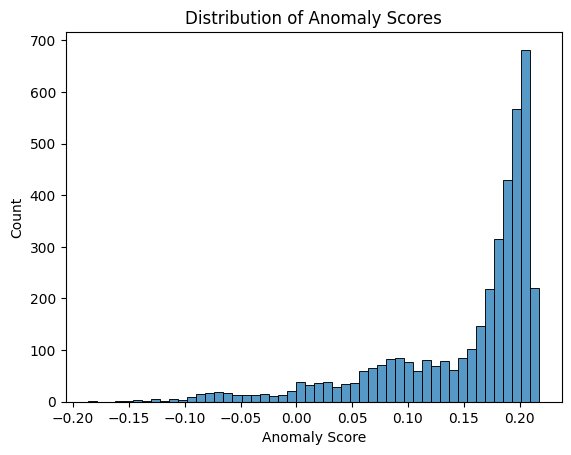

In [119]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Prepare feature matrix (drop previous anomaly columns if any)
X = features.drop(columns=['anomaly'], errors='ignore').values

# 2️⃣ Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Fit Isolation Forest
clf = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
clf.fit(X_scaled)

# 4️⃣ Predict anomalies (-1 = anomaly, 1 = normal)
features['anomaly'] = clf.predict(X_scaled)

# 5️⃣ Compute continuous anomaly score
features['anomaly_score'] = clf.decision_function(X_scaled)

# 6️⃣ Check the top rows
print(features[['anomaly', 'anomaly_score']].head())

# 7️⃣ Plot anomaly score distribution
sns.histplot(features['anomaly_score'], bins=50)
plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.show()



In [120]:
top_suspicious = features[features['anomaly'] == -1].sort_values('anomaly_score')
top_suspicious.head()


,num_logins,avg_login_hour,unique_pcs,num_files_accessed_file,num_files_to_removable_file,num_files_from_removable_file,unique_files_file,avg_content_length_file,num_emails_sent_email,avg_num_recipients_email,...,num_connects_decoy,num_disconnects_decoy,unique_pcs_device_decoy,avg_filetree_length_decoy,num_http_requests_decoy,unique_urls_decoy,unique_pcs_http_decoy,avg_content_length_http_decoy,anomaly,anomaly_score
user,,,,,,,,,,,,,,,,,,,,,
SDH2394,33,12.030303,5,667.0,233.0,320.0,282.0,553.923538,91,4.263736,...,266.0,266.0,1.0,15.500000,462.0,207.0,1.0,604.935065,-1,-0.186401
JDM1042,40,12.400000,1,605.0,200.0,325.0,243.0,542.887603,69,3.492754,...,258.0,256.0,1.0,15.536965,306.0,49.0,1.0,581.271242,-1,-0.156955
IMC3296,35,13.371429,5,577.0,184.0,331.0,210.0,613.124783,5,3.400000,...,259.0,258.0,1.0,26.539652,18.0,16.0,1.0,626.777778,-1,-0.155767
RAA1455,27,12.777778,1,577.0,192.0,329.0,193.0,565.809359,36,3.694444,...,276.0,276.0,1.0,32.000000,197.0,48.0,1.0,590.446701,-1,-0.151078
CJM0273,29,11.793103,2,614.0,195.0,362.0,196.0,601.097720,45,3.644444,...,268.0,266.0,1.0,26.576779,212.0,62.0,1.0,635.929245,-1,-0.145364


In [122]:
features.to_csv("results.csv", index=True)   # keep index (user) in CSV


In [ ]:
LSTM

In [ ]:
# Suppose features has [user, date, logon_count, file_count, http_count, device_count, decoy_count]

features['date'] = pd.to_datetime(features['date'])
features = features.sort_values(['user', 'date'])

X, y = [], []
timesteps = 10   # e.g., look at 10 days history

for user, group in features.groupby('user'):
    group = group.drop(['user', 'date'], axis=1).values
    for i in range(len(group) - timesteps):
        X.append(group[i:i+timesteps])       # past 10 days
        y.append(anomaly_labels[i+timesteps])  # anomaly label at next day
